In [11]:
import torch
from torch import nn
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import requests
import os
import logging

from lib.lib import WaveRawData, WaveData, device, Util, training_loop, PINNLoss
from lib.model import MLP, MultiscaleFourierEmbedding, FFMLP, AnisotropicFourierMLP

In [12]:
wave_raw_data = WaveRawData()

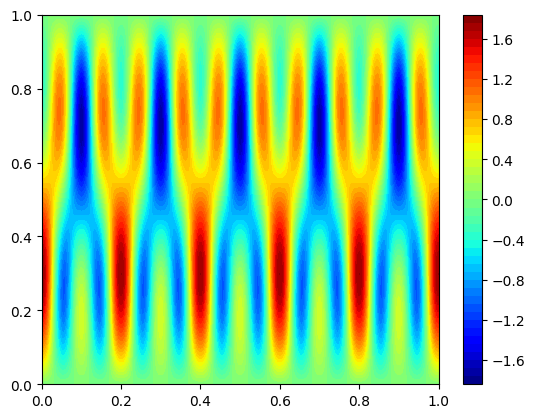

In [3]:
plt.contourf(wave_raw_data.T, wave_raw_data.X, wave_raw_data.u, levels=50, cmap="jet")
plt.colorbar()

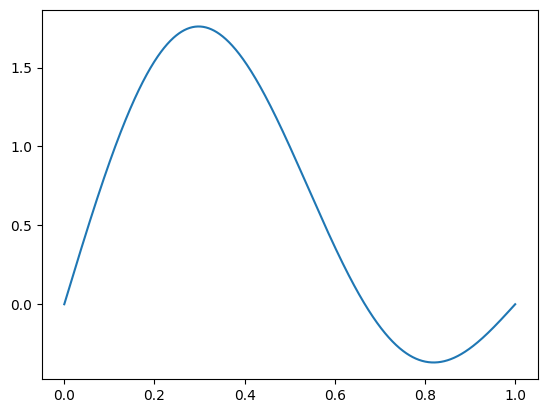

In [4]:
plt.plot(wave_raw_data.X[:,0], wave_raw_data.u[:,0])

In [5]:
util = Util()
wave_data = WaveData(wave_raw_data, 50, 50, 10000, util=util)

In [6]:
mlp = MLP().to(device)

optimizer = torch.optim.Adam(mlp.parameters())
criterion = PINNLoss()

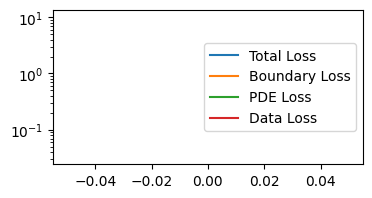

In [7]:
training_loop(epochs=1, wave_data=wave_data, model=mlp, criterion=criterion, optimizer=optimizer)

In [13]:
x, t = torch.tensor(wave_raw_data.X.reshape(-1), dtype=torch.float, device=device), torch.tensor(wave_raw_data.T.reshape(-1), dtype=torch.float, device=device)
y = mlp(x, t)

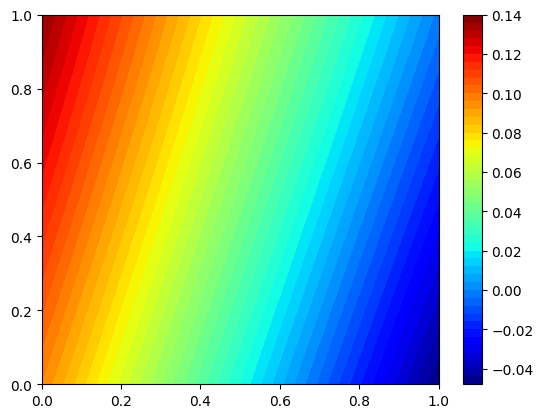

In [17]:
y_reshaped = y.reshape(wave_raw_data.u.shape[0], wave_raw_data.u.shape[1])

plt.contourf(wave_raw_data.T, wave_raw_data.X, y_reshaped.detach().cpu(), levels=50, cmap="jet")
plt.colorbar()

In [8]:
ffmlp = FFMLP(sigmas=[1.0, 10.0, 50.0]).to(device)

optimizer = torch.optim.Adam(ffmlp.parameters())
criterion = PINNLoss()

In [9]:
optimizer = torch.optim.Adam(ffmlp.parameters())

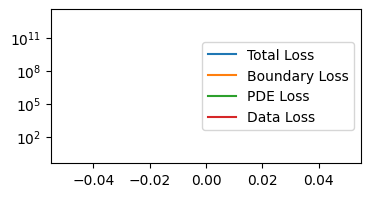

In [10]:
training_loop(epochs=1, wave_data=wave_data, model=ffmlp, criterion=criterion, optimizer=optimizer)

In [ ]:
saved = torch.load('./Anisotropic/fourier_nn-19998.pt', map_location=torch.device('cpu'))

ffmlp.load_state_dict(saved['model_state_dict'])

NameError: name 'ffmlp' is not defined

In [23]:
x, t = torch.tensor(wave_raw_data.X.reshape(-1), dtype=torch.float, device=device), torch.tensor(wave_raw_data.T.reshape(-1), dtype=torch.float, device=device)
y = ffmlp(x, t)

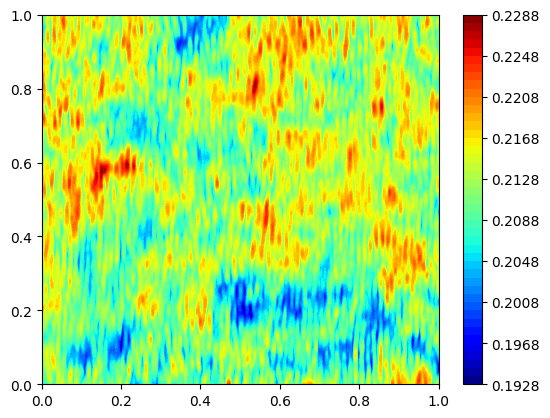

In [24]:
y_reshaped = y.reshape(wave_raw_data.u.shape[0], wave_raw_data.u.shape[1])

plt.contourf(wave_raw_data.T, wave_raw_data.X, y_reshaped.detach().cpu(), levels=50, cmap="jet")
plt.colorbar()

In [18]:
anisotropic_fourier_mlp = AnisotropicFourierMLP(sigmas=[1.0, 10.0]).to(device)

optimizer = torch.optim.Adam(anisotropic_fourier_mlp.parameters())
criterion = PINNLoss()

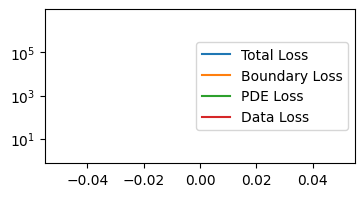

In [ ]:
training_loop(epochs=1, wave_data=wave_data, model=anisotropic_fourier_mlp, criterion=criterion, optimizer=optimizer)

In [26]:
saved = torch.load('./Anisotropic/fourier_nn-23067.pt', map_location=torch.device('cpu'))

anisotropic_fourier_mlp.load_state_dict(saved['model_state_dict'])

<All keys matched successfully>

In [27]:
x, t = torch.tensor(wave_raw_data.X.reshape(-1), dtype=torch.float, device=device), torch.tensor(wave_raw_data.T.reshape(-1), dtype=torch.float, device=device)
y = anisotropic_fourier_mlp(x, t)

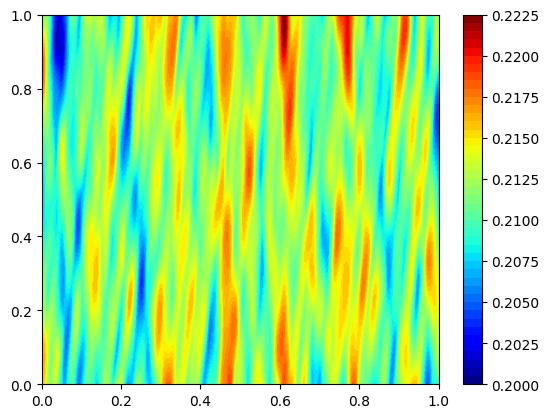

In [28]:
y_reshaped = y.reshape(wave_raw_data.u.shape[0], wave_raw_data.u.shape[1])

plt.contourf(wave_raw_data.T, wave_raw_data.X, y_reshaped.detach().cpu(), levels=50, cmap="jet")
plt.colorbar()